In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal

In [3]:
# Load cleaned data
benin = pd.read_csv('../../data/benin_clean.csv')
togo = pd.read_csv('../../data/togo_clean.csv')
sierra = pd.read_csv('../../data/sierraleone_clean.csv')

# Add country labels
benin['Country'] = 'Benin'
togo['Country'] = 'Togo'
sierra['Country'] = 'Sierra Leone'

# Combine into one DataFrame
df_all = pd.concat([benin, togo, sierra], ignore_index=True)

# Preview
df_all.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,cleaned_flag,Country,GHIrsi
0,NaN,1.8,-0.1,1.6,4.5,4.3,NaN,NaN,1.9,2.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Benin,NaN
1,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,...,0.0,998.0,0.0,0.0,26.3,26.2,NaN,True,Benin,NaN
2,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,...,0.0,998.0,0.0,0.0,26.3,26.2,NaN,True,Benin,NaN
3,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,...,1.5,997.0,0.0,0.0,26.4,26.2,NaN,True,Benin,NaN
4,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,...,1.3,997.0,0.0,0.0,26.4,26.3,NaN,True,Benin,NaN


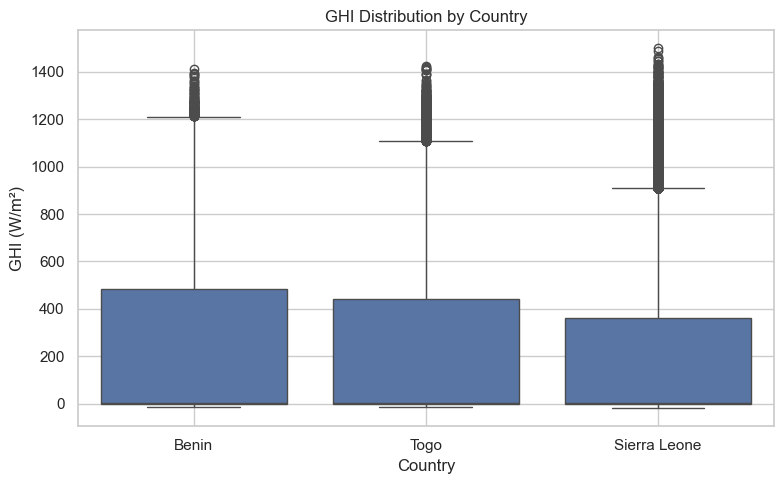

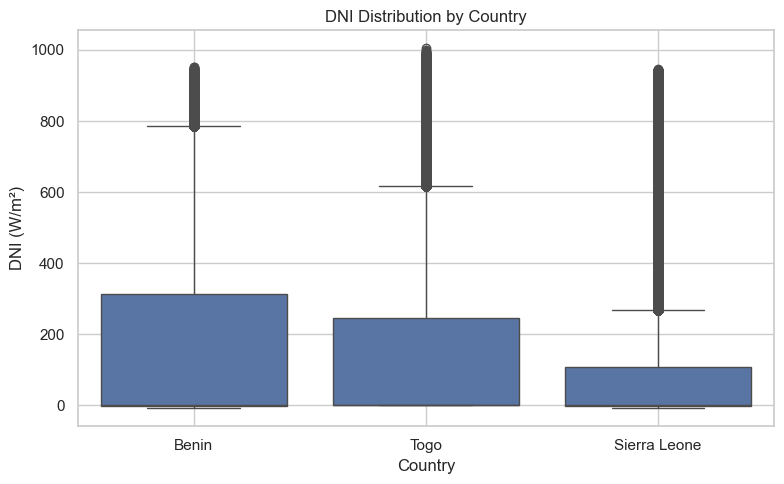

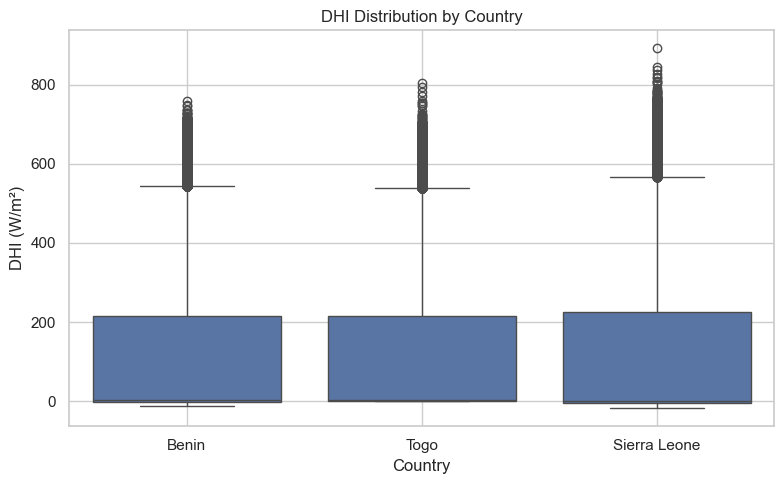

In [25]:
# Metrics to compare
metrics = ['GHI', 'DNI', 'DHI']

# Plot each metric
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_all, x='Country', y=metric)
    plt.title(f'{metric} Distribution by Country')
    plt.ylabel(f'{metric} (W/m²)')
    plt.xlabel('Country')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# Define stats to compute
summary_stats = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])

# Flatten MultiIndex columns
summary_stats.columns = ['_'.join(col) for col in summary_stats.columns]
summary_stats = summary_stats.reset_index()

# Display summary table
print("Summary Statistics Table:")
display(summary_stats)

Summary Statistics Table:


,Country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,240.558998,1.8,331.131176,167.187198,-0.1,261.710353,115.358744,1.6,158.691000
1,Sierra Leone,201.957132,0.3,298.494996,116.376115,-0.1,218.652510,113.720354,-0.1,158.945958
2,Togo,230.554605,2.1,322.532194,151.258181,0.0,250.956810,116.444136,2.5,156.520644


In [11]:
# Extract GHI values for each country
ghi_benin = benin['GHI']
ghi_togo = togo['GHI']
ghi_sierra = sierra['GHI']

# One-way ANOVA
anova_stat, anova_p = f_oneway(ghi_benin, ghi_togo, ghi_sierra)

# Kruskal-Wallis test (non-parametric)
kruskal_stat, kruskal_p = kruskal(ghi_benin, ghi_togo, ghi_sierra)

# Display results
print("One-way ANOVA result:")
print(f"F-statistic = {anova_stat:.4f}, p-value = {anova_p:.4e}")

print("\nKruskal-Wallis test result:")
print(f"H-statistic = {kruskal_stat:.4f}, p-value = {kruskal_p:.4e}")

# Quick conclusion
if anova_p < 0.05:
    print("\n ANOVA: Statistically significant difference in GHI between countries.")
else:
    print("\n ANOVA: No statistically significant difference in GHI between countries.")

if kruskal_p < 0.05:
    print(" Kruskal–Wallis: Statistically significant difference in GHI between countries.")
else:
    print(" Kruskal–Wallis: No statistically significant difference in GHI between countries.")


One-way ANOVA result:
F-statistic = 2090.0913, p-value = 0.0000e+00

Kruskal-Wallis test result:
H-statistic = 4524.8644, p-value = 0.0000e+00

 ANOVA: Statistically significant difference in GHI between countries.
 Kruskal–Wallis: Statistically significant difference in GHI between countries.


#### Statistical Test Results

- Both **One-way ANOVA** and **Kruskal–Wallis** tests returned **p-values ≈ 0.0000**, indicating that the differences in **GHI** between Benin, Togo, and Sierra Leone are **statistically significant**.
- This means that **at least one country** has a GHI distribution that is meaningfully different from the others.
- Since both tests agree, we can be confident in this result regardless of the data's distribution.


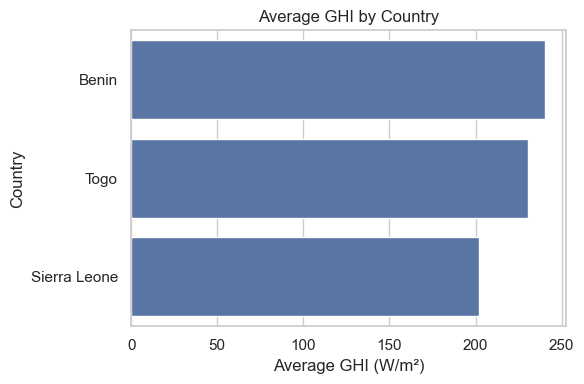

In [24]:
# Compute mean GHI per country
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index)
plt.title("Average GHI by Country")
plt.xlabel("Average GHI (W/m²)")
plt.ylabel("Country")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()